<a href="https://colab.research.google.com/github/YouMellouki/The-Sparks-Foundation-intern/blob/main/Collaborative_Clean_Transf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load files

Interactions = pd.read_csv('drive/MyDrive/EV_Data/InteractionsNew.csv',sep=';')
Avis = pd.read_csv('drive/MyDrive/EV_Data/AvisNew.csv', sep=';')
Achats = pd.read_csv('drive/MyDrive/EV_Data/AchatsNew.csv', sep=';')   




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Avis = pd.read_csv('drive/MyDrive/EV_Data/AvisNew.csv', sep=';')


In [ ]:
# Load files
data_produit = pd.read_csv('Produit.csv',sep=';', encoding="ISO-8859-1")
Avis = pd.read_csv('Avis.csv', sep=';')
Interactions = pd.read_csv('Interactions.csv', sep=';')


In [ ]:
Achats = pd.read_csv('Achatss.csv', sep=';')   


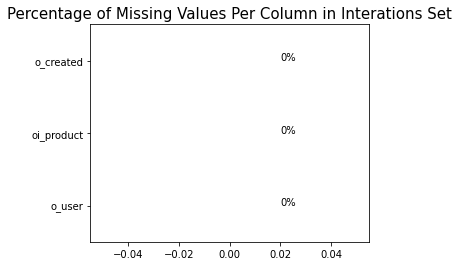

In [ ]:
 # Check if there any missing values in Interactions dataset
ax = Achats.isna().sum().sort_values().plot(kind = 'barh', figsize = (5, 4))
plt.title('Percentage of Missing Values Per Column in Interations Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/Achats.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
Interactions.describe()

,vs_date,vs_user
count,5.292140e+05,529214.000000
mean,1.605398e+09,595.731249
std,4.050848e+06,2540.040007
min,1.592973e+09,0.000000
25%,1.602160e+09,0.000000
50%,1.605650e+09,0.000000
75%,1.608692e+09,0.000000
max,1.612138e+09,13963.000000


In [ ]:
Interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529214 entries, 0 to 529213
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   vs_date    529214 non-null  int64 
 1   vs_page    529214 non-null  object
 2   vs_user    529214 non-null  int64 
 3   vs_cookie  529214 non-null  object
dtypes: int64(2), object(2)
memory usage: 16.2+ MB


In [ ]:
len(Interactions.vs_cookie.drop_duplicates())
# on a juste 67661 clients.

67661

In [ ]:
#transform timestamp to date format
import datetime
L=[]
date = Interactions['vs_date']
for i in range(len(date)):
  readable = datetime.datetime.fromtimestamp(date[i]).isoformat()
  L.append(readable)

Interactions['vs_date'] = L
Interactions.head(10)

,vs_date,vs_page,vs_user,vs_cookie
0,2021-01-01T00:02:34,/returns.php?action=addtocart&p_id=601&qte=1,0,160945901172
1,2021-01-01T00:03:31,/produits?search=Eau+de+rose&page=1,0,160889570630
2,2021-01-01T00:26:27,/produits/huile-d-argan/1,0,160946076636
3,2021-01-01T00:26:39,/produits?c_id=15&c_level=1&page=1&gclid=CjwKC...,0,160946076636
4,2021-01-01T00:26:55,/produits/chocolats/1,0,160946076636
5,2021-01-01T00:27:13,/produits?c_id=15&c_level=1&page=1&gclid=CjwKC...,0,160946076636
6,2021-01-01T00:32:28,/produits/artisanat/1,0,160932444053
7,2021-01-01T00:32:35,/produits/produits-cosmetiques/1,0,160932444053
8,2021-01-01T00:32:39,/produits/fruits-legumes-frais/1?gclid=EAIaIQo...,0,160627579060
9,2021-01-01T00:39:56,/produits/beaute-des-cheveux/1,0,160946137926


In [ ]:
Inter = Interactions.groupby(by='vs_cookie').agg('count')
Inter

,vs_date,vs_page,vs_user
vs_cookie,,,
1532360578,85,85,85
1532362406,59,59,59
1532369297,17,17,17
1532601421,5,5,5
1532966940,16,16,16
...,...,...,...
160561978017,5,5,5
160561981586,1,1,1
160561989454,1,1,1


In [ ]:
Inter.describe()

,vs_date,vs_page,vs_user
count,67661.000000,67661.000000,67661.000000
mean,7.821552,7.821552,7.821552
std,82.081584,82.081584,82.081584
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000
75%,7.000000,7.000000,7.000000
max,14417.000000,14417.000000,14417.000000


(180421, 4)

Delete duplicate cookies

In [ ]:
df = Interactions.groupby(['vs_cookie']).size()
df.head()

vs_cookie
1532360578    85
1532362406    59
1532369297    17
1532601421     5
1532966940    16
dtype: int64

In [ ]:
ids = pd.Series(df)
ids

vs_cookie
1532360578      85
1532362406      59
1532369297      17
1532601421       5
1532966940      16
                ..
160561978017     5
160561981586     1
160561989454     1
160562004132     1
932d8abe569      8
Length: 67661, dtype: int64

In [ ]:
def count(cookie):
    return ids[cookie]

In [ ]:
Interactions['count']=Interactions['vs_cookie'].apply(lambda c : count(c))
Interactions.head()

,vs_date,vs_page,vs_user,vs_cookie,count
0,1592973486,/produits/produits-frais/1,642,1579598083,35
1,1592973491,/produits/produits-frais/1,642,1579598083,35
2,1592973495,/produits/booster-votre-immunite/1,642,1579598083,35
3,1592973497,/produits/epicerie-salee/1,642,1579598083,35
4,1592973500,/produits/epices-condiments/1,642,1579598083,35


In [ ]:
Interactions_fil = Interactions[Interactions['vs_cookie'] != 0]
Interactions_fil = Interactions_fil[Interactions_fil['count'] <= 100]

In [ ]:
Interactions_fil.head()

,vs_date,vs_page,vs_user,vs_cookie,count
0,1592973486,/produits/produits-frais/1,642,1579598083,35
1,1592973491,/produits/produits-frais/1,642,1579598083,35
2,1592973495,/produits/booster-votre-immunite/1,642,1579598083,35
3,1592973497,/produits/epicerie-salee/1,642,1579598083,35
4,1592973500,/produits/epices-condiments/1,642,1579598083,35


In [ ]:
Interactions_fil.shape

(442799, 5)

Remove search Interactions

In [ ]:
def search_url(url):
    if ('search' in url):
        return 1
    else: return 0

In [ ]:
Interactions_fil['search_url']=Interactions_fil['vs_page'].apply(lambda url : search_url(url))


In [ ]:
Interactions_fil = Interactions_fil[Interactions_fil['search_url'] == 0]


In [ ]:
Interactions_fil.shape

(263294, 6)

In [ ]:
Interactions_fil.head()

,vs_date,vs_page,vs_user,vs_cookie,count,search_url
0,1592973486,/produits/produits-frais/1,642,1579598083,35,0
1,1592973491,/produits/produits-frais/1,642,1579598083,35,0
2,1592973495,/produits/booster-votre-immunite/1,642,1579598083,35,0
3,1592973497,/produits/epicerie-salee/1,642,1579598083,35,0
4,1592973500,/produits/epices-condiments/1,642,1579598083,35,0


In [ ]:
df_final = Interactions_fil.drop(['count','search_url','vs_user'], axis=1)
df_final.head()

,vs_date,vs_page,vs_cookie
0,1592973486,/produits/produits-frais/1,1579598083
1,1592973491,/produits/produits-frais/1,1579598083
2,1592973495,/produits/booster-votre-immunite/1,1579598083
3,1592973497,/produits/epicerie-salee/1,1579598083
4,1592973500,/produits/epices-condiments/1,1579598083


In [ ]:
df_final.shape

(263294, 3)

Separate Actions

In [ ]:
from re import search
import re


In [ ]:
df1 = df_final.loc[df_final['vs_page'].str.contains("addtocart")]
df1['Actions']="Ajout_pannier"
df1.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,vs_date,vs_page,vs_cookie,Actions
5,1592973508,/returns.php?action=addtocart&p_id=481&qte=1,1579598083,Ajout_pannier
16,1592974129,/returns.php?action=addtocart&p_id=1663&qte=1,1532369297,Ajout_pannier
29,1592978758,/returns.php?action=addtocart&p_id=1600&qte=1,159142964728,Ajout_pannier
63,1592984363,/returns.php?action=addtocart&p_id=1606&qte=1,159298425493,Ajout_pannier
64,1592984373,/returns.php?action=addtocart&p_id=1599&qte=1,159298425493,Ajout_pannier


Finding productID from Actions

In [ ]:
def find_number(text, c):
    return re.findall(r'%s(\d+)' % c, text)[0]

In [ ]:
df1['ProductID']=0


df1['ProductID']=df1['vs_page'].apply(lambda txt: find_number(txt, 'p_id='))
df1.head()
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,vs_date,vs_page,vs_cookie,Actions,ProductID
5,1592973508,/returns.php?action=addtocart&p_id=481&qte=1,1579598083,Ajout_pannier,481
16,1592974129,/returns.php?action=addtocart&p_id=1663&qte=1,1532369297,Ajout_pannier,1663
29,1592978758,/returns.php?action=addtocart&p_id=1600&qte=1,159142964728,Ajout_pannier,1600
63,1592984363,/returns.php?action=addtocart&p_id=1606&qte=1,159298425493,Ajout_pannier,1606
64,1592984373,/returns.php?action=addtocart&p_id=1599&qte=1,159298425493,Ajout_pannier,1599


Visit Product



In [ ]:
df2 = df_final[df_final['vs_page'].str.contains("/produits/")]
df2 = df2[df2['vs_page'].str.contains(".htm")]

df2['Actions']="Visite_product"#493

df2.head()


,vs_date,vs_page,vs_cookie,Actions
2920,1593068099,/produits/natural-shakes/poudre-de-maca-bio-15...,156422315367,Visite_product
3009,1593072891,/produits/amlou/huile-de-coco-extra-vierge-200...,158020687410,Visite_product
3335,1593083811,/produits/miels-premium/nature-et-passions.html,157018302166,Visite_product
3592,1593090445,/produits/huiles-alimentaires/terre-brune.html,158319516560,Visite_product
5033,1593128569,/produits/huiles-alimentaires/pate-de-figue-hu...,159266751624,Visite_product


In [ ]:
L=[]

def find_number_before(text):
    L = re.findall(r"(\d{5})\s*[.htm]", text)
    if len(L) !=0:
      return L[0]
    else: return 0



In [ ]:
df2['ProductID']=0

df2['ProductID']=df2['vs_page'].apply(lambda txt: find_number_before(txt))
df2.head()
  

,vs_date,vs_page,vs_cookie,Actions,ProductID
2920,1593068099,/produits/natural-shakes/poudre-de-maca-bio-15...,156422315367,Visite_product,00877
3009,1593072891,/produits/amlou/huile-de-coco-extra-vierge-200...,158020687410,Visite_product,01240
3335,1593083811,/produits/miels-premium/nature-et-passions.html,157018302166,Visite_product,0
3592,1593090445,/produits/huiles-alimentaires/terre-brune.html,158319516560,Visite_product,0
5033,1593128569,/produits/huiles-alimentaires/pate-de-figue-hu...,159266751624,Visite_product,00788


In [ ]:
df2= df2[df2['ProductID'] != 0]
df2.head()

,vs_date,vs_page,vs_cookie,Actions,ProductID
2920,1593068099,/produits/natural-shakes/poudre-de-maca-bio-15...,156422315367,Visite_product,00877
3009,1593072891,/produits/amlou/huile-de-coco-extra-vierge-200...,158020687410,Visite_product,01240
5033,1593128569,/produits/huiles-alimentaires/pate-de-figue-hu...,159266751624,Visite_product,00788
5542,1593161601,/produits/super-food/huile-de-coco-extra-vierg...,159316109459,Visite_product,01240
12343,1599107196,/produits/entretien-des-wc/lingettes-nettoyant...,159910719549,Visite_product,01777


In [ ]:
df2.shape

(1646, 5)

In [ ]:
# Concatenating dataframes without duplicates
df_=df1.append(df2, ignore_index=True)
df_.head()

,vs_date,vs_page,vs_cookie,Actions,ProductID
0,1592973508,/returns.php?action=addtocart&p_id=481&qte=1,1579598083,Ajout_pannier,481
1,1592974129,/returns.php?action=addtocart&p_id=1663&qte=1,1532369297,Ajout_pannier,1663
2,1592978758,/returns.php?action=addtocart&p_id=1600&qte=1,159142964728,Ajout_pannier,1600
3,1592984363,/returns.php?action=addtocart&p_id=1606&qte=1,159298425493,Ajout_pannier,1606
4,1592984373,/returns.php?action=addtocart&p_id=1599&qte=1,159298425493,Ajout_pannier,1599


In [ ]:
df_.shape

(19428, 5)

In [ ]:
df_.columns = ['timestamp', 'url','userID','Actions','ProductID']
df_.head()

,timestamp,url,userID,Actions,ProductID
0,1592973508,/returns.php?action=addtocart&p_id=481&qte=1,1579598083,Ajout_pannier,481
1,1592974129,/returns.php?action=addtocart&p_id=1663&qte=1,1532369297,Ajout_pannier,1663
2,1592978758,/returns.php?action=addtocart&p_id=1600&qte=1,159142964728,Ajout_pannier,1600
3,1592984363,/returns.php?action=addtocart&p_id=1606&qte=1,159298425493,Ajout_pannier,1606
4,1592984373,/returns.php?action=addtocart&p_id=1599&qte=1,159298425493,Ajout_pannier,1599


In [ ]:
df_ = df_.sort_values(by="timestamp")
df_.head()

,timestamp,url,userID,Actions,ProductID
0,1592973508,/returns.php?action=addtocart&p_id=481&qte=1,1579598083,Ajout_pannier,481
1,1592974129,/returns.php?action=addtocart&p_id=1663&qte=1,1532369297,Ajout_pannier,1663
2,1592978758,/returns.php?action=addtocart&p_id=1600&qte=1,159142964728,Ajout_pannier,1600
3,1592984363,/returns.php?action=addtocart&p_id=1606&qte=1,159298425493,Ajout_pannier,1606
4,1592984373,/returns.php?action=addtocart&p_id=1599&qte=1,159298425493,Ajout_pannier,1599


In [ ]:
df_= df_.drop(['url'],axis=1)
df_.head()

,timestamp,userID,Actions,ProductID
0,1592973508,1579598083,Ajout_pannier,481
1,1592974129,1532369297,Ajout_pannier,1663
2,1592978758,159142964728,Ajout_pannier,1600
3,1592984363,159298425493,Ajout_pannier,1606
4,1592984373,159298425493,Ajout_pannier,1599


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actions Distribution')

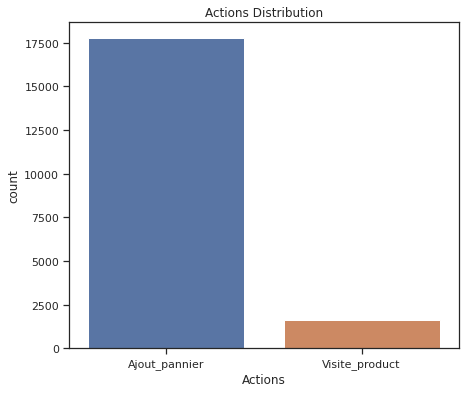

In [ ]:
plt.figure(figsize=(7, 6))
sns.countplot(df_.Actions)
plt.title('Actions Distribution')

Achats

In [ ]:
Achats.head()

,o_user,oi_product,o_created
0,583,671,1557322318
1,583,614,1557322318
2,1733,353,1556445114
3,1736,738,1556475750
4,1736,872,1556475750


In [ ]:
Achats['counter'] = 1 
group_data = Achats.groupby(['o_user','oi_product'])['counter'].sum()

In [ ]:
Achats_m = group_data.to_frame()
Achats_m = Achats_m.reset_index()

In [ ]:
def get_doubleachat(n):
    if n > 1:
        return 'Doubleachat'
    else:
        return 'Achat'

In [ ]:
Achats_m['Actions'] = Achats_m['counter'].apply(lambda c : get_doubleachat(c))


In [ ]:
Achats_m.head()

,o_user,oi_product,counter,Actions
0,0,71,1,Achat
1,0,120,1,Achat
2,0,133,1,Achat
3,0,211,1,Achat
4,0,1317,1,Achat


In [ ]:
df_Achats = Achats_m.drop('counter', axis= 1)


Chercher à recuperer les doubles Achats

In [ ]:
df_Achats.columns = ['userID', 'ProductID','Actions']
df_Achats.head()

,userID,ProductID,Actions
0,0,71,Achat
1,0,120,Achat
2,0,133,Achat
3,0,211,Achat
4,0,1317,Achat


In [ ]:
#Ajout_pannier=1
#Visite_Produit=2
#Achats=3


In [ ]:
len(df_Achats['userID'].unique())

4084

In [ ]:

df_Achats.shape

(27203, 3)

In [ ]:
 count_prod = Achats.groupby(['userID', 'ProductID']).size()
 count_prod.sort_values()


userID  ProductID
40      152          1
13835   1600         1
13836   150          1
        872          1
        877          1
                    ..
13147   877          3
642     1240         3
13147   873          3
642     872          3
13147   872          3
Length: 721, dtype: int64

In [ ]:
new_df = count_prod.sort_values().to_frame(name = 'Count').reset_index()
new_df[:10]

,userID,ProductID,Count
0,40,152,1
1,13835,1600,1
2,13836,150,1
3,13836,872,1
4,13836,877,1
5,13836,1536,1
6,13847,1240,1
7,13847,1537,1
8,13848,875,1
9,13848,876,1


In [ ]:
new_df['Double_Achats']=0
for i in range(len(new_df.userID)):
  if new_df.Count[i]>=2:
    new_df['Double_Achats'][i]==1


In [ ]:
new_df.head()

,userID,ProductID,Count,Double_Achats
0,40,152,1,0
1,13835,1600,1,0
2,13836,150,1,0
3,13836,872,1,0
4,13836,877,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actions Distribution')

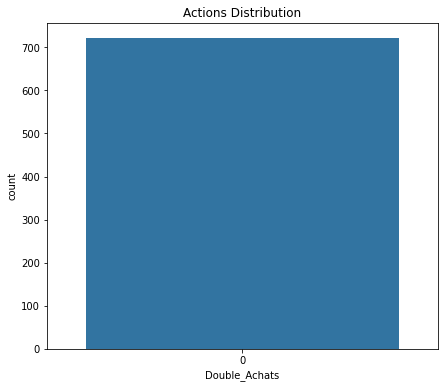

In [ ]:
plt.figure(figsize=(7, 6))
sns.countplot(new_df.Double_Achats)
plt.title('Actions Distribution')

In [ ]:
# so with table achats, this is no double sales product
new_df=new_df[new_df['Double_Achats']==1]
new_df.head()

,userID,ProductID,Count,Double_Achats


Avis

In [ ]:
Avis.head()

,pr_user,pr_product,pr_created,pr_note
0,26,135,1518714866,5
1,26,257,1518715207,5
2,29,338,1518719203,5
3,29,337,1518719499,5
4,29,108,1518720526,5


In [ ]:
Avis.columns = ['pr_id','ProductID','userID','Note']
Avis.head()


,pr_id,ProductID,userID,Note
0,26,135,1518714866,5
1,26,257,1518715207,5
2,29,338,1518719203,5
3,29,337,1518719499,5
4,29,108,1518720526,5


In [ ]:
Avis = Avis.drop(['pr_id'],axis=1)

In [ ]:
dff=df_Achats.append(Avis,ignore_index=True)
dff.head()

,userID,ProductID,Actions,Note
0,0,71,Achat,NaN
1,0,120,Achat,NaN
2,0,133,Achat,NaN
3,0,211,Achat,NaN
4,0,1317,Achat,NaN


Final Data_cleaning

In [ ]:
df0=df_.append(dff, ignore_index=True)
df0.shape

(48786, 5)

In [ ]:
df0.head()

,timestamp,userID,Actions,ProductID,Note
0,1.592974e+09,1579598083,Ajout_pannier,481,NaN
1,1.592974e+09,1532369297,Ajout_pannier,1663,NaN
2,1.592979e+09,159142964728,Ajout_pannier,1600,NaN
3,1.592984e+09,159298425493,Ajout_pannier,1606,NaN
4,1.592984e+09,159298425493,Ajout_pannier,1599,NaN


In [ ]:
df0= df0.sort_values(by="timestamp")
df0.head()


,timestamp,userID,Actions,ProductID,Note
0,1.592974e+09,1579598083,Ajout_pannier,481,NaN
1,1.592974e+09,1532369297,Ajout_pannier,1663,NaN
2,1.592979e+09,159142964728,Ajout_pannier,1600,NaN
3,1.592984e+09,159298425493,Ajout_pannier,1606,NaN
4,1.592984e+09,159298425493,Ajout_pannier,1599,NaN


Visulalization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actions Distribution')

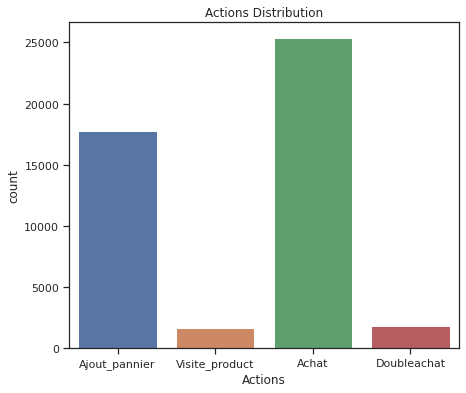

In [ ]:
plt.figure(figsize=(7, 6))
sns.countplot(df0.Actions)
plt.title('Actions Distribution')

In [ ]:
len(df0['ProductID'].unique())

2605

Algo

In [ ]:
def action_number(s):
  if s == 'Ajout_pannier':
    return 1
  elif s == 'Achat':
    return 2
  elif s == 'Doubleachat':
    return 3
  elif s == 'Visite_product':
    return 4
  else:
    return 5
        

In [ ]:
df0['Action'] = df0['Actions'].apply(lambda s : action_number(s))
df0.head()

,timestamp,userID,Actions,ProductID,Note,Action
0,1.592974e+09,1579598083,Ajout_pannier,481,NaN,1
1,1.592974e+09,1532369297,Ajout_pannier,1663,NaN,1
2,1.592979e+09,159142964728,Ajout_pannier,1600,NaN,1
3,1.592984e+09,159298425493,Ajout_pannier,1606,NaN,1
4,1.592984e+09,159298425493,Ajout_pannier,1599,NaN,1


In [ ]:
''''1 - Visite produit - String contains "%-<REF>.htm%"
2 - Achat - (à récupérer de la table achats)
3 - Double achat - (à récupérer de la table achats)
4 - Ajout au panier - String contains "%&addtocart%"
5 - Visite Catégorie - String contains "%/produits/%"
6 - Recherche - String contains "%search%"
7 - Avis - (à récupérer de la table avis) date : date de l'interaction

Output :
Table Ratings

Algorithm :
usersArray = get distinct userID
for each usersArray
productsArray = get distinct productID where userID = this userID
break = 0
for each productsArray
actions = array[userID,productID]
if actions contains 7
rating = noteAvis
break = 1
if 1 < countAchats & break == 0
rating = 5
break = 1
if countAchats == 1 & break == 0
rating = 4,5
break = 1
if actions contains 4 & break == 0
rating = 3,5
break = 1
if 1 < countVisits & break == 0
rating = 3,5
break = 1
if countVisits == 1 & break == 0
rating = 3
break = 1
end for each
end for each''''''''''''

In [ ]:
# we have no countAchats so we can user this formula temporary 
# countAchats == 1, means action = 3 --->  rating = 4,5
#actions contains 4, means action= 1 ----> rating = 3,5
# actions contains 7, means action= 4, rating = note
#countVisits == 1, means action= 2, rating = 3
#Ajout_pannier=1
#Visite_Produit=2
#Achats=3

#df0.loc[df0['Actions'] == 3, 'Note'] = 4.5 
#df0.loc[df0['Actions'] == 1, 'Note'] = 3.5 
#df0.loc[df0['Actions'] == 2, 'Note'] = 3 

  
def get_rate(n):
  if n == 1:
    return 3.5
  elif n == 3:
    return 5
  elif n == 2:
    return 4.5
  elif n == 4:
    return 4.5
  
    

In [ ]:
df0['Note'] = df0['Action'].apply(lambda n : get_rate(n))


In [ ]:
df0.head()

,timestamp,userID,Actions,ProductID,Note,Action
0,1.592974e+09,1579598083,Ajout_pannier,481,3.5,1
1,1.592974e+09,1532369297,Ajout_pannier,1663,3.5,1
2,1.592979e+09,159142964728,Ajout_pannier,1600,3.5,1
3,1.592984e+09,159298425493,Ajout_pannier,1606,3.5,1
4,1.592984e+09,159298425493,Ajout_pannier,1599,3.5,1


In [ ]:
df0 = df0.drop(['timestamp','Actions','Action'], axis=1)
df0.head()

,userID,ProductID,Note
0,1579598083,481,3.5
1,1532369297,1663,3.5
2,159142964728,1600,3.5
3,159298425493,1606,3.5
4,159298425493,1599,3.5


In [ ]:
df0.to_csv('table_rating.csv',index=False)


In [ ]:
df0 = pd.read_csv('table_rating (1).csv')
df0.head()

,userID,ProductID,Note
0,1579598083,481,3.5
1,1532369297,1663,3.5
2,159142964728,1600,3.5
3,159298425493,1606,3.5
4,159298425493,1599,3.5


User_Item approche

In [ ]:
Mean = df0.groupby(by="userID",as_index=False)['Note'].mean()
Rating_avg = pd.merge(df0,Mean,on='userID')
Rating_avg['adg_rating']=Rating_avg['Note_x']-Rating_avg['Note_y']
Rating_avg.head()

,userID,ProductID,Note_x,Note_y,adg_rating
0,1579598083,481,3.5,3.5,0.0
1,1532369297,1663,3.5,3.5,0.0
2,1532369297,1931,3.5,3.5,0.0
3,1532369297,1950,3.5,3.5,0.0
4,1532369297,1929,3.5,3.5,0.0


In [ ]:
final = pd.pivot_table(Rating_avg,values='adg_rating',index='userID',columns='ProductID')
final.head()

ProductID,29,30,31,33,34,35,36,45,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,...,2442,2447,2449,2451,2452,2454,2457,2459,2460,2461,2462,2465,2468,2500,2502,2503,2508,2528,2529,2535,2646,2648,2650,2662,2663,2664,2666,2667,2674,2676,2691,2699,2714,2717,2748,2754,2756,2769,2777,2783
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,-0.05625,NaN,-0.05625,-0.05625,-0.05625,NaN,NaN,NaN,-0.05625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05625,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,-0.035714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replacing NaN by product Average
final_product = final.fillna(final.mean(axis=0))

# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In [ ]:
final_product.head()


ProductID,29,30,31,33,34,35,36,45,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,...,2442,2447,2449,2451,2452,2454,2457,2459,2460,2461,2462,2465,2468,2500,2502,2503,2508,2528,2529,2535,2646,2648,2650,2662,2663,2664,2666,2667,2674,2676,2691,2699,2714,2717,2748,2754,2756,2769,2777,2783
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.007307,-0.012232,-0.020051,-0.017038,0.010905,0.054562,0.0,-0.02381,0.032336,0.004696,0.000000,-0.006885,-0.032183,-0.013708,-0.000773,-0.012428,-0.030787,0.013111,-0.016172,-0.0133,-0.027091,0.061958,0.045697,-0.047212,-0.005233,0.041885,0.039526,-0.003444,-0.069444,-0.002826,0.07182,0.019783,0.007269,-0.032011,-0.044276,0.032222,-0.013615,-0.004021,0.046108,0.019912,...,0.0,-0.112903,0.0,-0.112903,-0.065217,-0.065217,0.0,-0.056554,0.0,-0.070505,0.0,-0.032609,-0.023529,0.0,0.0,-0.008621,0.0,0.0,0.0,0.0,-0.008929,0.0,0.0,-0.122807,-0.122807,-0.122807,-0.122807,-0.122807,-0.047059,-0.122807,-0.047059,-0.047059,-0.122807,-0.122807,0.0,0.0,-0.047059,0.0,-0.029748,0.0
23,-0.007307,-0.012232,-0.020051,-0.017038,0.010905,0.054562,0.0,-0.02381,0.032336,0.004696,-0.000337,-0.006885,-0.032183,-0.013708,-0.000773,-0.012428,-0.030787,0.013111,-0.016172,-0.0133,-0.027091,0.061958,0.045697,-0.047212,-0.005233,0.041885,0.039526,-0.003444,-0.069444,-0.002826,0.07182,0.019783,0.007269,-0.032011,-0.044276,0.032222,-0.013615,-0.004021,0.046108,0.019912,...,0.0,-0.112903,0.0,-0.112903,-0.065217,-0.065217,0.0,-0.056554,0.0,-0.070505,0.0,-0.032609,-0.023529,0.0,0.0,-0.008621,0.0,0.0,0.0,0.0,-0.008929,0.0,0.0,-0.122807,-0.122807,-0.122807,-0.122807,-0.122807,-0.047059,-0.122807,-0.047059,-0.047059,-0.122807,-0.122807,0.0,0.0,-0.047059,0.0,-0.029748,0.0
29,0.000000,-0.012232,-0.020051,-0.017038,0.010905,0.054562,0.0,-0.02381,0.032336,0.004696,-0.000337,-0.006885,-0.032183,-0.013708,-0.000773,-0.012428,-0.030787,0.013111,-0.016172,-0.0133,-0.027091,0.061958,0.045697,-0.047212,0.000000,0.041885,0.039526,-0.003444,-0.069444,-0.002826,0.07182,0.019783,0.007269,-0.032011,-0.044276,0.032222,-0.013615,-0.004021,0.046108,0.019912,...,0.0,-0.112903,0.0,-0.112903,-0.065217,-0.065217,0.0,-0.056554,0.0,-0.070505,0.0,-0.032609,-0.023529,0.0,0.0,-0.008621,0.0,0.0,0.0,0.0,-0.008929,0.0,0.0,-0.122807,-0.122807,-0.122807,-0.122807,-0.122807,-0.047059,-0.122807,-0.047059,-0.047059,-0.122807,-0.122807,0.0,0.0,-0.047059,0.0,-0.029748,0.0
31,-0.007307,-0.056250,-0.020051,-0.056250,-0.056250,-0.056250,0.0,-0.02381,0.032336,-0.056250,-0.000337,-0.006885,-0.032183,-0.013708,-0.000773,-0.012428,-0.030787,0.013111,-0.016172,-0.0133,-0.027091,0.061958,0.045697,-0.047212,-0.005233,-0.056250,0.039526,-0.003444,-0.069444,-0.002826,0.07182,0.019783,0.007269,-0.032011,-0.056250,0.032222,-0.013615,-0.004021,0.046108,0.019912,...,0.0,-0.112903,0.0,-0.112903,-0.065217,-0.065217,0.0,-0.056554,0.0,-0.070505,0.0,-0.032609,-0.023529,0.0,0.0,-0.008621,0.0,0.0,0.0,0.0,-0.008929,0.0,0.0,-0.122807,-0.122807,-0.122807,-0.122807,-0.122807,-0.047059,-0.122807,-0.047059,-0.047059,-0.122807,-0.122807,0.0,0.0,-0.047059,0.0,-0.029748,0.0
33,-0.035714,-0.012232,-0.020051,-0.017038,0.010905,0.054562,0.0,-0.02381,0.032336,0.004696,-0.000337,-0.006885,-0.032183,-0.013708,-0.000773,-0.012428,-0.030787,0.013111,-0.016172,-0.0133,-0.027091,0.061958,0.045697,-0.047212,-0.005233,0.041885,0.039526,-0.003444,-0.069444,-0.002826,0.07182,0.019783,0.007269,-0.032011,-0.044276,0.032222,-0.013615,-0.004021,0.046108,0.019912,...,0.0,-0.112903,0.0,-0.112903,-0.065217,-0.065217,0.0,-0.056554,0.0,-0.070505,0.0,-0.032609,-0.023529,0.0,0.0,-0.008621,0.0,0.0,0.0,0.0,-0.008929,0.0,0.0,-0.122807,-0.122807,-0.122807,-0.122807,-0.122807,-0.047059,-0.122807,-0.047059,-0.047059,-0.122807,-0.122807,0.0,0.0,-0.047059,0.0,-0.029748,0.0


In [ ]:
final_user.head()


ProductID,29,30,31,33,34,35,36,45,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,...,2442,2447,2449,2451,2452,2454,2457,2459,2460,2461,2462,2465,2468,2500,2502,2503,2508,2528,2529,2535,2646,2648,2650,2662,2663,2664,2666,2667,2674,2676,2691,2699,2714,2717,2748,2754,2756,2769,2777,2783
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
23,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,...,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16,4.115949e-16
29,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
31,-3.552714e-16,-5.625000e-02,-3.552714e-16,-5.625000e-02,-5.625000e-02,-5.625000e-02,-3.552714e-16,-3.552714e-16,-3.552714e-16,-5.625000e-02,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-5.625000e-02,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,-3.552714e-16,

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

userID,0,23,29,31,33,36,40,42,73,78,82,93,96,98,103,128,130,146,151,158,163,165,174,179,186,197,211,213,221,228,231,236,242,248,249,256,281,290,302,314,...,161204152045,161204366137,161204568716,161204569033,161204698580,161204778567,161205030553,161205079742,161205416070,161207336133,161207448879,161207458119,161207875287,161208324410,161208335951,161208611028,161208622976,161208721890,161208822222,161208910653,161209014916,161209026438,161209369225,161209666593,161209905596,161209920721,161210502374,161210625219,161211024817,161211138470,161211259179,161211435969,161211953631,161212200878,161212257351,161212429484,161212821161,161212905693,161213412561,161213686672
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.000000,0.0,-0.015138,0.007512,0.0,0.001778,0.0,1.301561e-32,0.003886,0.0,0.0,0.0,1.628143e-28,0.0,0.0,-0.033855,0.0,0.0,-0.014466,-5.683444e-29,3.328582e-28,0.0,-0.019393,0.0,0.005362,0.009830,0.0,-4.930381e-32,0.0,-0.026356,0.0,0.0,0.0,0.0,4.359969e-28,0.0,-4.979140e-28,0.0,0.004359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,-0.015138,0.0,0.000000,-0.035774,0.0,0.043712,0.0,7.165640e-33,-0.050725,0.0,0.0,0.0,4.551100e-03,0.0,0.0,-0.036853,0.0,0.0,-0.018955,3.163450e-03,9.396845e-03,0.0,-0.068829,0.0,-0.010701,0.039843,0.0,2.465190e-32,0.0,-0.004304,0.0,0.0,0.0,0.0,-2.306059e-28,0.0,2.505615e-28,0.0,0.143088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.007512,0.0,-0.035774,0.000000,0.0,0.072428,0.0,3.124998e-33,-0.073907,0.0,0.0,0.0,2.446487e-03,0.0,0.0,0.006604,0.0,0.0,-0.012018,-5.668475e-04,3.367576e-03,0.0,0.315492,0.0,0.005229,-0.059916,0.0,-1.232595e-32,0.0,-0.030845,0.0,0.0,0.0,0.0,1.320715e-02,0.0,-1.574022e-28,0.0,0.008503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# user similarity on replacing NAN by item(product) avg
cosine = cosine_similarity(final_product)
np.fill_diagonal(cosine, 0 )
similarity_with_product = pd.DataFrame(cosine,index=final_product.index)
similarity_with_product.columns=final_user.index
similarity_with_product.head()

userID,0,23,29,31,33,36,40,42,73,78,82,93,96,98,103,128,130,146,151,158,163,165,174,179,186,197,211,213,221,228,231,236,242,248,249,256,281,290,302,314,...,161204152045,161204366137,161204568716,161204569033,161204698580,161204778567,161205030553,161205079742,161205416070,161207336133,161207448879,161207458119,161207875287,161208324410,161208335951,161208611028,161208622976,161208721890,161208822222,161208910653,161209014916,161209026438,161209369225,161209666593,161209905596,161209920721,161210502374,161210625219,161211024817,161211138470,161211259179,161211435969,161211953631,161212200878,161212257351,161212429484,161212821161,161212905693,161213412561,161213686672
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.919940,0.998739,0.800784,0.906057,0.998781,0.604378,0.999127,0.979199,0.949379,0.999131,0.999135,0.998664,0.966901,0.999108,0.998887,0.968263,0.998637,0.998691,0.878426,0.836673,0.929006,0.998979,0.809468,0.999097,0.784988,0.668514,0.997345,0.976089,0.998999,0.806869,0.999092,0.998167,0.999035,0.998805,0.964335,0.999041,0.965300,0.999085,0.921206,...,0.999010,0.999093,0.999143,0.998888,0.999121,0.999140,0.999063,0.998881,0.999079,0.999139,0.999043,0.999126,0.998894,0.998904,0.999140,0.999141,0.999114,0.999120,0.999114,0.999136,0.999137,0.999060,0.998968,0.999133,0.998984,0.998631,0.999124,0.999132,0.998943,0.999137,0.999143,0.999035,0.998994,0.999138,0.999114,0.999143,0.999093,0.999126,0.998823,0.998818
23,0.919940,0.000000,0.919900,0.738043,0.836424,0.920382,0.556563,0.920825,0.902326,0.875267,0.920694,0.920698,0.920279,0.890954,0.920674,0.920476,0.887934,0.920242,0.920210,0.807268,0.770002,0.856166,0.920556,0.738392,0.920664,0.723649,0.622173,0.919412,0.899381,0.920574,0.736987,0.920659,0.919744,0.920608,0.920404,0.888672,0.920613,0.889520,0.920792,0.849003,...,0.920586,0.920660,0.920704,0.920478,0.920685,0.920702,0.920633,0.920471,0.920648,0.920701,0.920615,0.920689,0.920482,0.920492,0.920701,0.920703,0.920679,0.920684,0.920679,0.920698,0.920699,0.920630,0.920548,0.920696,0.920563,0.920249,0.920687,0.920695,0.920526,0.920699,0.920704,0.920608,0.920572,0.920700,0.920679,0.920704,0.920660,0.920689,0.920419,0.920416
29,0.998739,0.919900,0.000000,0.800851,0.905954,0.998735,0.602617,0.999082,0.979154,0.949483,0.999086,0.999090,0.998619,0.966858,0.999063,0.998841,0.968219,0.998591,0.998648,0.877848,0.837038,0.928963,0.998931,0.809433,0.999052,0.784953,0.668571,0.997308,0.976045,0.998951,0.807137,0.999110,0.998121,0.999098,0.998760,0.964291,0.998995,0.965256,0.999040,0.921165,...,0.998964,0.999048,0.999098,0.998843,0.999075,0.999095,0.999017,0.998835,0.999034,0.999094,0.998997,0.999081,0.998848,0.998859,0.999094,0.999096,0.999069,0.999074,0.999115,0.999090,0.999092,0.999014,0.998922,0.999088,0.998939,0.998586,0.999078,0.999087,0.998897,0.999091,0.999098,0.999098,0.998949,0.999093,0.999115,0.999098,0.999048,0.999081,0.998777,0.998773
31,0.800784,0.738043,0.800851,0.000000,0.719857,0.805031,0.483659,0.805642,0.789411,0.748556,0.805480,0.805483,0.805920,0.779885,0.805587,0.805296,0.773672,0.805107,0.805231,0.700428,0.673349,0.754372,0.805363,0.616845,0.805454,0.626030,0.555349,0.799390,0.786777,0.805378,0.652746,0.805429,0.804752,0.805407,0.805234,0.777496,0.805412,0.778208,0.805445,0.767185,...,0.805813,0.805451,0.805489,0.805297,0.805472,0.805487,0.805428,0.801152,0.805441,0.805486,0.805413,0.805476,0.805301,0.801727,0.805486,0.805488,0.805467,0.805471,0.805467,0.805483,0.805485,0.805426,0.805357,0.805482,0.805369,0.805028,0.805474,0.805481,0.806138,0.805484,0.805488,0.805407,0.805377,0.805486,0.805467,0.805489,0.805451,0.805549,0.803136,0.805928
33,0.906057,0.836424,0.905954,0.719857,0.000000,0.906505,0.574736,0.906818,0.888730,0.847355,0.906821,0.906825,0.906400,0.878632,0.906800,0.906601,0.880088,0.906335,0.906424,0.795715,0.756060,0.843852,0.906681,0.810356,0.906790,0.713897,0.587143,0.902434,0.885894,0.906699,0.723245,0.906786,0.905951,0.906734,0.906527,0.876246,0.

In [ ]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [ ]:
# top 10 neighbours for each user
sim_user_10_u = find_n_neighbours(similarity_with_user,10)
sim_user_10_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
userID,,,,,,,,,,
0,161213686672,10843,10861,10856,10851,10847,10846,10845,10834,10867
23,6077,10818,7242,2668,3158,11212,11153,2222,5281,8786
29,161213686672,10843,10861,10856,10851,10847,10846,10845,10834,10867
31,2664,8149,1367,1926,534,1904,11462,10669,11106,13620
33,10916,697,5952,13940,4375,8415,179,11699,4851,2786


In [ ]:
# top 10 neighbours for each user
sim_user_10_m = find_n_neighbours(similarity_with_product,10)
sim_user_10_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
userID,,,,,,,,,,
0,3774,11901,5980,5063,8313,6193,9418,160077367967,14545,4028
23,10818,6077,160500887380,159680332722,160295073147,160412080753,160600284410,14077,160572227358,7941
29,11901,5980,5063,8313,160413908153,6193,9418,11036,161200739073,160582157667
31,10669,534,11462,1904,1367,1926,11106,13620,9320,7865
33,10916,5952,697,4375,13940,2791,3063,2844,160552213970,12448


In [ ]:
def get_user_similar_products( user1, user2 ):
    common_products = Rating_avg[Rating_avg.userID == user1].merge(
    Rating_avg[Rating_avg.userID == user2],
    on = "ProductID",
    how = "inner" )
    return common_products.merge( df0, on = 'ProductID' )

In [ ]:
a = get_user_similar_products(33,78)
a = a.loc[ : , ['Note_x_x','Note_x_y','ProductID']]
a.head()

,Note_x_x,Note_x_y,ProductID
0,5.0,4.5,572
1,5.0,4.5,572
2,5.0,4.5,572
3,5.0,4.5,572
4,5.0,4.5,572


In [ ]:
def User_item_score(user,item):
    a = sim_user_10_m[sim_user_10_m.index==user].values
    b = a.squeeze().tolist()
    c = final_product.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['userID'] == user,'Note'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_product.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [ ]:
score = User_item_score(23,1663)
print("score (u,i) is",score)

score (u,i) is 4.5502770023523125


In [ ]:
Rating_avg = Rating_avg.astype({"ProductID": str})
Product_user = Rating_avg.groupby(by = 'userID')['ProductID'].apply(lambda x:','.join(x))

In [ ]:
check = pd.pivot_table(Rating_avg,values='Note_x',index='userID',columns='ProductID')
check.head()

ProductID,1001,1003,1004,1005,1006,1007,1008,1009,101,1010,1011,1014,1015,1016,1017,1018,1019,102,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,103,1030,1032,1039,104,1040,1041,1045,1046,1047,1048,1049,...,951,952,953,954,956,957,958,959,96,960,961,962,963,964,965,968,969,97,970,971,972,973,979,98,980,981,983,985,986,987,99,990,991,992,993,994,995,996,998,999
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.5,4.5,4.5,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN


In [ ]:
def User_item_score1(user):
    Product_seen_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_10_m[sim_user_10_m.index==user].values
    b = a.squeeze().tolist()
    d = Product_user[Product_user.index.isin(b)]
    l = ','.join(d.values)
    Product_seen_by_similar_users = l.split(',')
    Product_under_consideration = list(set(Product_seen_by_similar_users)-set(list(map(str, Product_seen_by_user))))
    Product_under_consideration = list(map(int, Product_under_consideration))
    score = []
    for item in Product_under_consideration:
        c = final_product.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['userID'] == user,'Note'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_product.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'ProductID':Product_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Products_ids = top_5_recommendation.ProductID.values.tolist()
    return Products_ids

In [ ]:
user = int(input("Enter the user id to whom you want to recommend : "))
predicted_products = User_item_score1(user)
print(" ")
print("The Recommendations for User Id : 23")
print("   ")
for i in predicted_products:
    print(i)

Enter the user id to whom you want to recommend : 23
 
The Recommendations for User Id : 23
   
239
1241
1231
1130
584


In [ ]:
dict={}
for i in check.index:
  dict[i] = User_item_score1(i)
  

In [ ]:
dict

In [ ]:
recommendation = pd.DataFrame(list(dict.items()),columns=['UserId','RecommendationID'])
recommendation.to_csv('NewRecommendationsNew_Yunes.csv', index=False)

In [ ]:
recommendation.head(10)

,UserId,RecommendationID
0,0,"[128, 483, 1241, 790, 484]"
1,23,"[239, 1241, 1231, 1130, 584]"
2,29,"[128, 483, 1241, 484, 790]"
3,31,"[362, 920, 798, 1594, 738]"
4,33,"[1108, 1020, 745, 86, 885]"
5,36,"[873, 887, 872, 2137, 2163]"
6,40,"[1100, 1646, 1327, 128, 1750]"
7,42,[]
8,73,[]
9,78,"[742, 726, 857, 632, 1130]"


Item_item approche

In [ ]:
productProperties = df0.groupby('ProductID').agg({'Note': [np.size, np.mean]})
productProperties.head()

Note          
           size      mean
ProductID                
29         65.0  4.518182
30         18.0  4.176471
31         19.0  4.000000
33         28.0  3.981481
34         47.0  4.109756

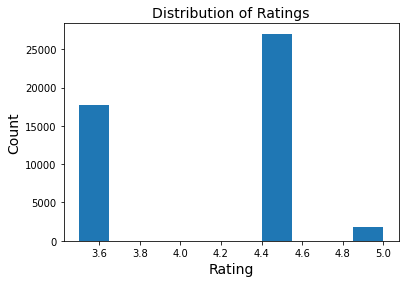

In [ ]:
plt.hist(df0['Note'])
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Ratings", fontsize=14)
plt.show()

In [ ]:
matrix= pd.pivot_table(df0 , values="Note", index="userID", columns="ProductID")
matrix


ProductID,29,30,31,33,34,35,36,45,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,...,2442,2447,2449,2451,2452,2454,2457,2459,2460,2461,2462,2465,2468,2500,2502,2503,2508,2528,2529,2535,2646,2648,2650,2662,2663,2664,2666,2667,2674,2676,2691,2699,2714,2717,2748,2754,2756,2769,2777,2783
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,4.5,NaN,4.5,4.5,4.5,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161212429484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161212821161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161212905693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matrix= matrix.fillna(0)
matrix.head()

ProductID,29,30,31,33,34,35,36,45,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,...,2442,2447,2449,2451,2452,2454,2457,2459,2460,2461,2462,2465,2468,2500,2502,2503,2508,2528,2529,2535,2646,2648,2650,2662,2663,2664,2666,2667,2674,2676,2691,2699,2714,2717,2748,2754,2756,2769,2777,2783
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,4.5,0.0,4.5,4.5,4.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Matrix = imputer.fit_transform(matrix)
#Matrix

In [ ]:
#Matrix1 = pd.DataFrame(Matrix, index =matrix.index, columns=matrix.columns)
#Matrix1

In [ ]:
#using svd


In [ ]:
df0['userID'] = df0['userID'].astype('str')
df0['ProductID'] = df0['ProductID'].astype('str')
users = df0['userID'].unique() #list of all users
products = df0['ProductID'].unique() #list of all products
print("Number of users", len(users))
print("Number of products", len(products))
print(df0.head())

Number of users 11284
Number of products 1748
         userID ProductID  Note
0    1579598083       481   3.5
1    1532369297      1663   3.5
2  159142964728      1600   3.5
3  159298425493      1606   3.5
4  159298425493      1599   3.5


In [ ]:
no_user_voted = df0.groupby('ProductID')['Note'].agg('count')
no_products_voted = df0.groupby('userID')['Note'].agg('count')

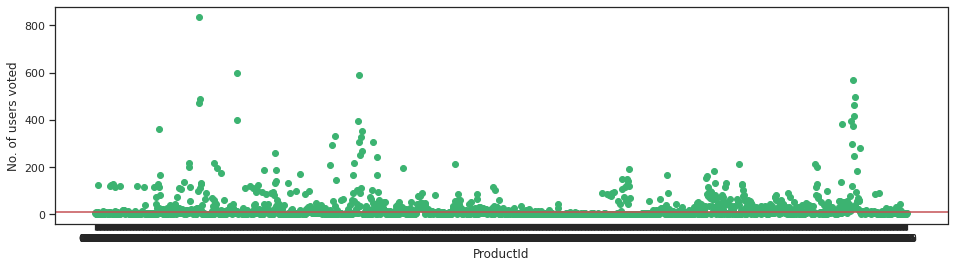

In [ ]:
#Let’s visualize the number of users who voted with our threshold of 10.
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('ProductId')
plt.ylabel('No. of users voted')
plt.show()

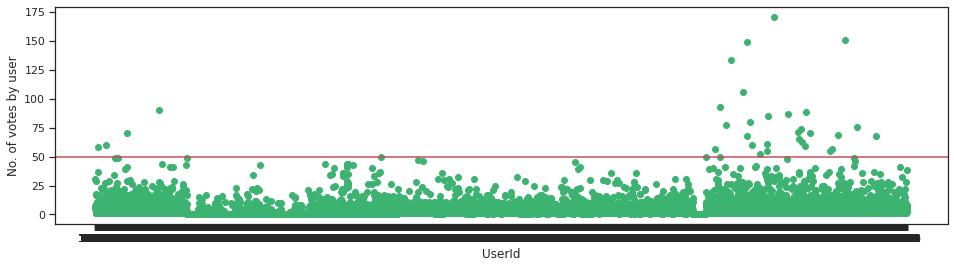

In [ ]:
#Let’s visualize the number of votes by each user with our threshold of 50.
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_products_voted.index,no_products_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

KNN

In [ ]:
matrix=matrix.T
from scipy.sparse import csr_matrix
rating__matrix = csr_matrix(matrix.values)


In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm ='brute')
model_knn.fit(rating__matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(matrix.shape[0])
distances, indices = model_knn.kneighbors(matrix.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 10)

for i in range(0, len(distances.flatten())):
  if i == 0:
    print('Recommendations for {0}:\n'.format(matrix.index[query_index]))
  else:
    print('{0}: {1}, with distance of {2}:'.format(i, matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 1709:

1: 2032, with distance of 0.6045526025033628:
2: 378, with distance of 0.6978010573922503:
3: 2666, with distance of 0.7280209516530253:
4: 2294, with distance of 0.7280209516530253:
5: 1158, with distance of 0.7280209516530253:
6: 2664, with distance of 0.7280209516530253:
7: 2667, with distance of 0.7280209516530253:
8: 2663, with distance of 0.7280209516530253:
9: 2676, with distance of 0.7280209516530253:


In [ ]:
dict={}
for i in range(matrix.shape[0]):
  L=[]
  distances, indices = model_knn.kneighbors(matrix.iloc[i, :].values.reshape(1, -1), n_neighbors = 6)
  for j in range(0, len(distances.flatten())):
    L.append(matrix.index[indices.flatten()[j]])
    dict[matrix.index[i]]=L
    




In [ ]:
dict

{29: [29, 1252, 1361, 1272, 969, 970],
 30: [30, 35, 2333, 2451, 575, 2447],
 31: [31, 1004, 2369, 925, 2359, 2257],
 33: [33, 1627, 86, 1718, 1772, 35],
 34: [34, 1267, 1268, 2717, 1158, 2667],
 35: [35, 30, 2699, 2756, 2674, 2691],
 36: [2442, 2457, 36, 2502, 2646, 2462],
 45: [45, 1010, 362, 1818, 903, 922],
 69: [69, 1215, 1007, 86, 75, 84],
 70: [70, 80, 71, 1655, 1540, 1661],
 71: [71, 1257, 1317, 70, 77, 84],
 72: [72, 1276, 1252, 75, 2236, 73],
 73: [73, 84, 2219, 2236, 2201, 2196],
 74: [74, 84, 81, 77, 76, 1405],
 75: [75, 69, 2191, 2049, 2174, 2219],
 76: [76, 2196, 2174, 2201, 1405, 2049],
 77: [77, 99, 81, 74, 1610, 940],
 78: [78, 91, 89, 934, 995, 2219],
 79: [79, 80, 92, 117, 2333, 575],
 80: [80, 2451, 2447, 2333, 575, 79],
 81: [81, 84, 99, 77, 1405, 2259],
 82: [82, 84, 2259, 83, 467, 702],
 83: [83, 82, 1712, 88, 84, 1081],
 84: [84, 82, 81, 1405, 465, 2259],
 85: [85, 2358, 2714, 2294, 1158, 2676],
 86: [86, 1962, 1718, 1800, 2008, 95],
 87: [87, 83, 82, 1680, 94, 

In [ ]:
recommendation1 = pd.DataFrame(list(dict.items()),columns=['ProductId','RecommendationID'])
recommendation1.to_csv('NewRecommendations_Yunes.csv', index=False)